In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"})
import numpy as np
from scipy.optimize import root

In [2]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from scipy import optimize
delta = 0.05
epsilon = 0.01
def fun(n):
    return np.sqrt(np.log(2*n/delta)/(2*n)) - epsilon
sol = optimize.root(fun, 100000, method='hybr')
H1 = sol.x

In [4]:
def fun(n, var):
    return np.sqrt(var) * np.sqrt(2*np.log(3*n/delta)/(n)) + 3*np.log(3*n/delta)/n - epsilon
ns = [(i, optimize.root(fun, 10000, args= (i), method='hybr').x[0])  for i in np.arange(0.01,0.5,0.01)] 

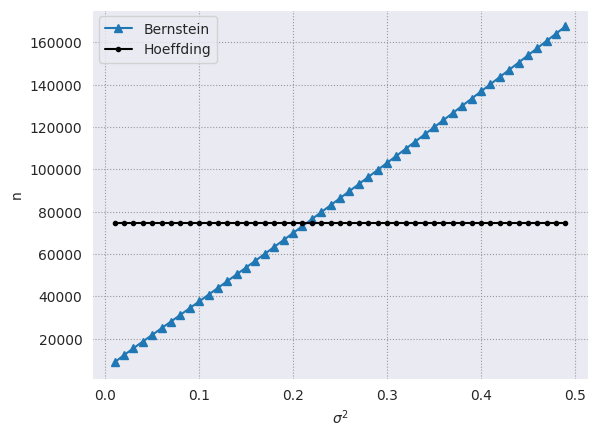

In [5]:
ns = np.array(ns)
plt.plot(ns[:,0],ns[:,1], label = "Bernstein", marker = "^")
# plt.hlines(H1,0,0.5,"r", label = "Hoeffding")
plt.plot(ns[:,0],[H1[0]]*len(ns[:,0]),"black", label = "Hoeffding", marker = ".")
plt.legend()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("n")
plt.savefig("t_eq_n.pdf",transparent=True)
plt.show()

In [7]:
from scipy import optimize
delta = 0.05
epsilon = 0.01
def fun(n):
    return np.sqrt(np.log(2*n/delta)/(2*n**2)) - epsilon
sol = optimize.root(fun, 100, method='hybr')
H2 = sol.x
H2

array([212.70627242])

In [8]:
def fun(n, sig):
    return np.sqrt(sig) * np.sqrt(2*np.log(3*n/delta)/(n**2)) + 3*np.log(3*n/delta)/n**2 - epsilon
ns2 = [(i, optimize.root(fun, 100, args= (i), method='hybr').x[0])  for i in np.arange(0.01,0.5,0.01)] 
ns2 = np.array(ns2)


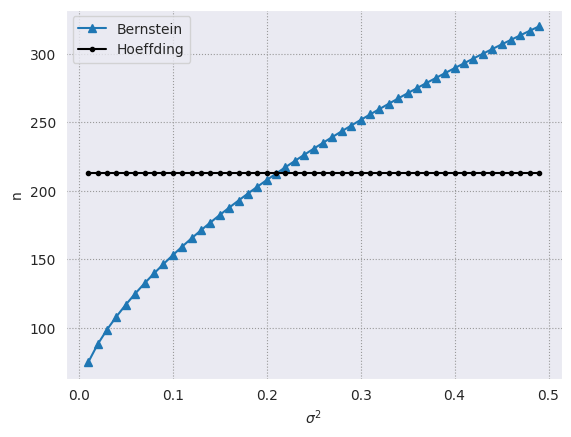

In [9]:
plt.plot(ns2[:,0],ns2[:,1], label = "Bernstein",marker = "^")
# plt.hlines(H2,0,0.5,"r", label = "Hoeffding")
plt.plot(ns[:,0],[H2[0]]*len(ns[:,0]),"black", label = "Hoeffding", marker = ".")

plt.legend()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("n")
plt.savefig("t_eq_n_q.pdf",transparent=True)
plt.show()

In [200]:
from scipy import optimize
delta = 0.05
epsilon = 0.01
def fun(n):
    return np.sqrt(np.log(2*n/delta)/(2*(n+60)**2)) - epsilon
sol = optimize.root(fun, 100, method='hybr')
H3 = sol.x
H3

array([148.43495774])

In [201]:
60**2

3600

In [202]:
def fun(n, sig):
    return np.sqrt(sig) * np.sqrt(2*np.log(3*n/delta)/(n+60)**2) + 3*np.log(3*n/delta)/(n+60)**2 - epsilon
ns3 = [(i, optimize.root(fun, 10, args= (i), method='hybr').x[0])  for i in np.arange(0.01,0.5,0.01)] 
ns3 = np.array(ns3)


/tmp/ipykernel_200734/3861166191.py:2: RuntimeWarning: invalid value encountered in log
  return np.sqrt(sig) * np.sqrt(2*np.log(3*n/delta)/(n+60)**2) + 3*np.log(3*n/delta)/(n+60)**2 - epsilon


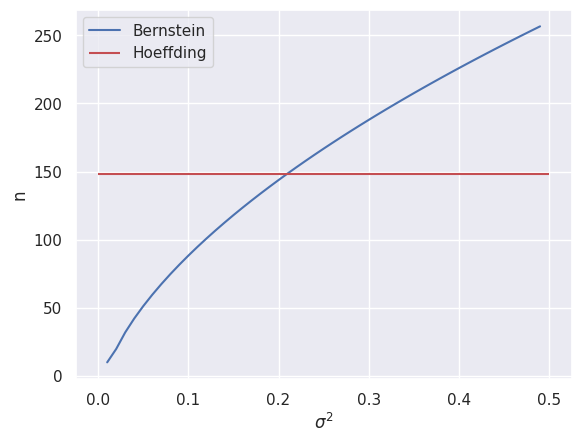

In [203]:
plt.plot(ns3[:,0],ns3[:,1], label = "Bernstein")
plt.hlines(H3,0,0.5,"r", label = "Hoeffding")
plt.legend()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("n")
plt.show()

/tmp/ipykernel_200734/764040343.py:12: RuntimeWarning: invalid value encountered in log
  return np.sqrt(sig) * np.sqrt(2*np.log(3*n/delta)/(n+t)**2) + 3*np.log(3*n/delta)/(n+t)**2 - epsilon


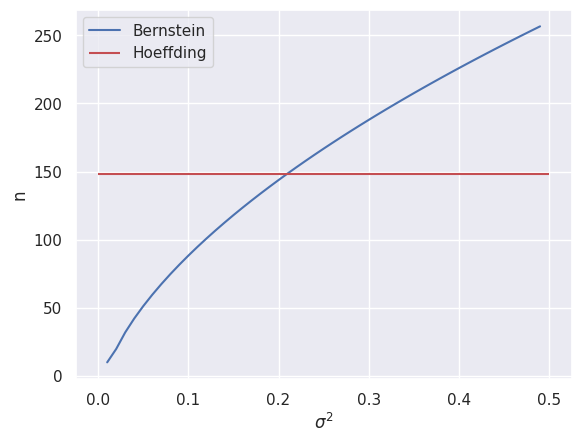

3600 [148.43495774]


In [204]:
from scipy import optimize
delta = 0.05
epsilon = 0.01
t = 60
def fun(n):
    return np.sqrt(np.log(2*n/delta)/(2*(n+t)**2)) - epsilon
sol = optimize.root(fun, 10, method='hybr')
H4 = sol.x
H4

def fun(n, sig):
    return np.sqrt(sig) * np.sqrt(2*np.log(3*n/delta)/(n+t)**2) + 3*np.log(3*n/delta)/(n+t)**2 - epsilon
ns4 = [(i, optimize.root(fun, 10, args= (i), method='hybr').x[0])  for i in np.arange(0.01,0.5,0.01)] 
ns4 = np.array(ns4)

plt.plot(ns4[:,0],ns4[:,1], label = "Bernstein")
plt.hlines(H4,0,0.5,"r", label = "Hoeffding")
plt.legend()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("n")
plt.show()
print(t**2, H4)

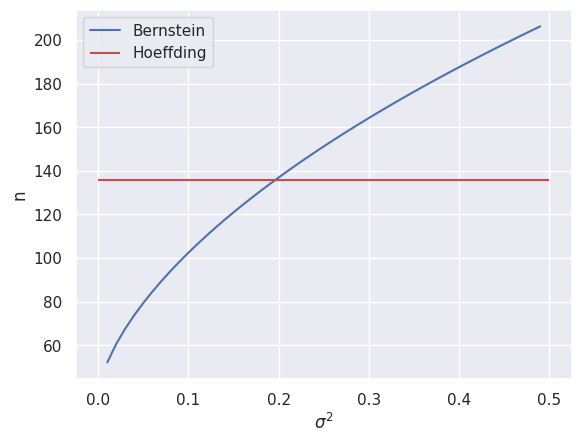

0 [135.81015157]


In [208]:
from scipy import optimize
delta = 0.05
epsilon = 0.01
t = 0
def fun(n):
    return np.sqrt(np.log(2/delta)/(2*(n+t)**2)) - epsilon
sol = optimize.root(fun, 10, method='hybr')
H4 = sol.x
H4

def fun(n, sig):
    return np.sqrt(sig) * np.sqrt(2*np.log(3/delta)/(n+t)**2) + 3*np.log(3/delta)/(n+t)**2 - epsilon
ns4 = [(i, optimize.root(fun, 10, args= (i), method='hybr').x[0])  for i in np.arange(0.01,0.5,0.01)] 
ns4 = np.array(ns4)

plt.plot(ns4[:,0],ns4[:,1], label = "Bernstein")
plt.hlines(H4,0,0.5,"r", label = "Hoeffding")
plt.legend()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("n")
plt.show()
print(t**2, H4)

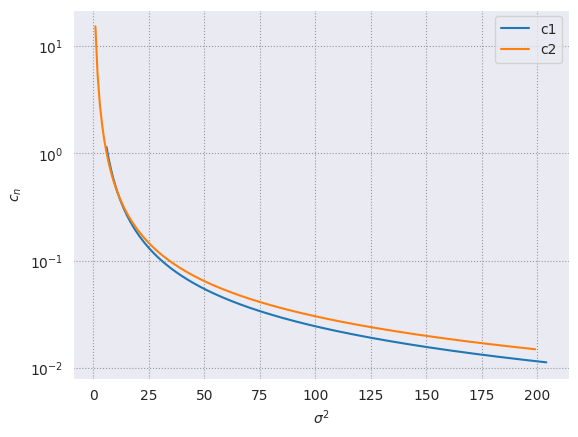

In [40]:
delta = 0.05
epsilon = 0.01
n_max = 208
t = 0
def cn1(n, sig2):
    return np.sqrt(sig2 * np.log(3/delta*n_max)/(n+5)**2)+ 3 * np.log(3/delta*n_max)/(n+5)**2
def cn2(n, sig2):
    return np.sqrt(sig2 * np.log(3/delta*n**2*np.pi**2/6)/n**2)+ 3 * np.log(3/delta*n**2*np.pi**2/6)/n**2


cs1 = np.array([(n, cn1(n, 0.5))  for n in np.arange(1,200,1)] )
cs2 = np.array([(n, cn2(n, 0.5))  for n in np.arange(1,200,1)] )
plt.plot(cs1[:,0]+5,cs1[:,1], label = "c1")
plt.plot(cs2[:,0],cs2[:,1], label = "c2")z

# plt.hlines(H4,0,0.5,"r", label = "Hoeffding")
plt.legend()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("$c_n$")
plt.yscale("log")
plt.show()


In [29]:
191*np.pi/6**2

16.667894356545848